#import necessary library
#Linear Regression

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
#data load 
df=pd.read_excel("data.xlsx")

In [3]:
#show dataset
df.head()

,x,y
0,48.955889,60.723602
1,44.687196,82.892504
2,60.297327,97.379897
3,45.618644,48.847153
4,38.816818,56.877213


Using head function we able to get first 5 data. We have 2 collumns in our dataset and and the collumns names are x & y.

In [4]:
#collumns rename
df=df.rename(columns={"x":"Height","y":"Weight"})
df.head()

,Height,Weight
0,48.955889,60.723602
1,44.687196,82.892504
2,60.297327,97.379897
3,45.618644,48.847153
4,38.816818,56.877213


In [5]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  99 non-null     float64
 1   Weight  99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


In [6]:
#check describe
df.describe()

,Height,Weight
count,99.000000,99.000000
mean,49.124564,73.149475
std,9.652463,16.216558
min,25.128485,41.412885
25%,41.648159,61.088576
50%,50.030174,72.247251
75%,56.798054,83.287411
max,70.346076,118.591217


In [7]:
#check duplicated value 
df.duplicated().sum()

np.int64(0)

Text(0.5, 1.0, 'Height and Weight relationship')

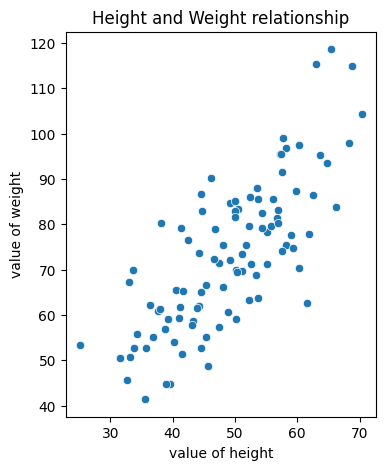

In [8]:
#visualization
plt.figure(figsize=(4,5))
sns.scatterplot(x="Height",y="Weight",data=df)
plt.xlabel("value of height")
plt.ylabel("value of weight")
plt.title("Height and Weight relationship")

In [9]:
#find co relation
df.corr()

,Height,Weight
Height,1.000000,0.766264
Weight,0.766264,1.000000


<Figure size 200x300 with 0 Axes>

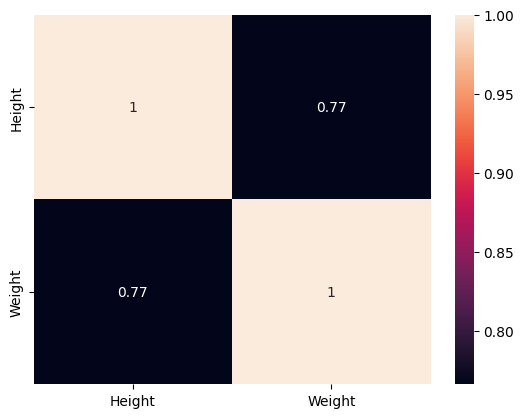

<Figure size 200x300 with 0 Axes>

In [10]:
sns.heatmap(df.corr(), annot=True)
plt.figure(figsize=(2,3))

In [11]:
#data separation
x=df[["Height"]]
y=df[["Weight"]]

In [12]:
y.head()

,Weight
0,60.723602
1,82.892504
2,97.379897
3,48.847153
4,56.877213


In [13]:
#split the data 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=(.20),random_state=42)
ytrain.head()

,Weight
49,80.166275
70,63.642399
68,52.721735
15,78.211518
39,52.682983


In [14]:
xtrain.head()

,Height
49,38.119824
70,53.660932
68,35.678094
15,55.142188
39,44.555608


In [15]:
#model implemenmtation
lr= LinearRegression()
lr

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
#train the model 
model = lr.fit(xtrain,ytrain)

In [17]:
#checck the train score
model.score(xtrain,ytrain)


0.5351098913885504

In [18]:
#test the model
model.score(xtest,ytest)

0.692783029905275

In [19]:
#prediction generate
pred_y=model.predict(xtest)
pred_y

array([[ 75.29719392],
       [ 66.95946006],
       [ 74.20168945],
       [ 72.81387336],
       [ 72.86868674],
       [ 80.36896248],
       [ 62.36035101],
       [ 67.63498356],
       [ 80.45372692],
       [ 73.85449589],
       [ 65.88097358],
       [ 59.14640789],
       [ 55.39672654],
       [ 91.78390943],
       [ 53.93498047],
       [ 61.45397362],
       [ 64.82813598],
       [ 85.12188219],
       [ 60.46168253],
       [100.01561951]])

In [20]:
xtest.shape,ytest.shape,pred_y.shape

((20, 1), (20, 1), (20, 1))

In [21]:
pred_y=model.predict([[50]])
pred_y

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[75.13148931]])

In [22]:
df["predicted value"]=model.predict(df[["Height"]])
df.head()

,Height,Weight,predicted value
0,48.955889,60.723602,73.854496
1,44.687196,82.892504,68.633701
2,60.297327,97.379897,87.725565
3,45.618644,48.847153,69.772901
4,38.816818,56.877213,61.453974


In [23]:
#error calculate
df["error"]=df["Weight"] - df["predicted value"]
df.head()

,Height,Weight,predicted value,error
0,48.955889,60.723602,73.854496,-13.130893
1,44.687196,82.892504,68.633701,14.258803
2,60.297327,97.379897,87.725565,9.654332
3,45.618644,48.847153,69.772901,-20.925748
4,38.816818,56.877213,61.453974,-4.576760


In [24]:
ytest.head()

,Weight
62,59.108839
40,58.569825
95,72.111832
18,75.331242
97,66.224958


In [25]:
y_pred=model.predict(xtest)

In [26]:
#calculate mse 
mse = mean_squared_error(ytest,y_pred)
mse

72.23130683527735

In [27]:
#calculate mae
mae = mean_absolute_error(ytest,y_pred)
mae


6.898123580553088

In [28]:
#check r2 score
r_score= r2_score(ytest,y_pred)
r_score

0.692783029905275

In [29]:
#find the value of m
m=model.coef_
m

array([[1.22304324]])

In [30]:
#find the value of c
c=model.intercept_
c

array([13.97932742])

Text(0.5, 1.0, 'Height and Weight relationship')

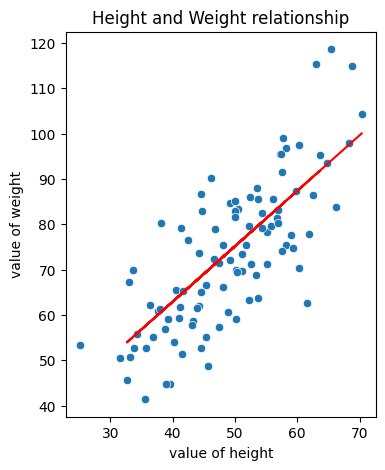

In [31]:
#Best fit line
plt.figure(figsize=(4,5))
sns.scatterplot(x="Height",y="Weight",data=df)
plt.plot(xtest,y_pred,color="r")
plt.xlabel("value of height")
plt.ylabel("value of weight")
plt.title("Height and Weight relationship")

In [32]:
import pickle

In [33]:
pickle.dump(model,open("height.pkl","wb"))